## Import all necessary library

In [24]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import tweepy
import time
import json
from PIL import Image
from io import BytesIO
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Gather necessary files and data

In [10]:
#Import twitter-archive-enhanced.csv as a DataFrame
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [11]:
#Request image-predictions.tsv and save it:
I = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as ip:
    for chunk in I.content:
        ip.write(chunk)

In [12]:
#Load image-predictions.tsv as DataFrame
images = pd.read_csv('image-predictions.tsv', sep = '\t')

In [13]:
#create consumer key, consumer secret, acess token, and acess token secret:
CONSUMER_KEY = 'XlYvH5KDVVmNNzSkuRtHiqeO7'
CONSUMER_SECRET = '1Cigs4Pc9GFsNy3W9osqupWDRPML6enmY2Kc2R3E2KSrS7iLV1'
ACCESS_TOKEN = '775734875747868673-57mC2Z0p9BLukr5NYhuo8rhxF2Ex4fq'
ACCESS_TOKEN_SECRET = 'FBSoHhZtJXcv58HhpclaPcFDyAF6njV7kWh55s6KUoRuc'

In [14]:
#authorize tweepy
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

In [17]:
#extract tweet information into dictionary
tweet_list = []
list_id = list(tweets['tweet_id'])
for ids in list_id:
    try:
        tweet = api.get_status(ids, tweet_mode='extended')
        tweet_id = tweet._json['id']
        start = time.time()
        print tweet_id
        end = time.time()
        print(end - start)
        retweet_count = int(tweet._json['retweet_count'])
        favorite_count = int(tweet._json['favorite_count'])
        media_type = tweet._json['entities']['media'][0]['type']
    except tweepy.TweepError:
        tweet_id = long(ids) #have a problem with Json Seriability so have to change type
        retweet_count = np.nan
        favorite_count = np.nan
        media_type = np.nan
    except KeyError:   
        media_type = np.nan     
    tweet_list.append({'tweet_id': tweet_id,
                       'media_type': media_type,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

892420643555336193
0.000999927520752
892177421306343426
0.0
891815181378084864
0.0
891689557279858688
0.000999927520752
891327558926688256
0.000999927520752
891087950875897856
0.0
890971913173991426
0.0
890729181411237888
0.0
890609185150312448
0.0
890240255349198849
0.0
890006608113172480
0.0
889880896479866881
0.00100016593933
889665388333682689
0.0
889638837579907072
0.0
889531135344209921
0.0
889278841981685760
0.0
888917238123831296
0.0
888804989199671297
0.0
888554962724278272
0.0
888078434458587136
0.00100016593933
887705289381826560
0.000999927520752
887517139158093824
0.0
887473957103951883
0.00100016593933
887343217045368832
0.000999927520752
887101392804085760
0.0
886983233522544640
0.000999927520752
886736880519319552
0.0
886680336477933568
0.000999927520752
886366144734445568
0.00100016593933
886267009285017600
0.0
886258384151887873
0.0
886054160059072513
0.000999927520752
885984800019947520
0.0
885528943205470208
0.0
885518971528720385
0.0
885311592912609280
0.0009999275

839290600511926273
0.0
839239871831150596
0.000999927520752
838952994649550848
0.000999927520752
838921590096166913
0.0
838916489579200512
0.0
838831947270979586
0.0
838561493054533637
0.0
838476387338051585
0.0
838201503651401729
0.0
838150277551247360
0.000999927520752
838085839343206401
0.0
838083903487373313
0.0
837820167694528512
0.0
837482249356513284
0.00100016593933
837471256429613056
0.000999927520752
837366284874571778
0.0
837110210464448512
0.0
836989968035819520
0.0
836753516572119041
0.0
836677758902222849
0.00100016593933
836648853927522308
0.0
836397794269200385
0.0
836380477523124226
0.0
836260088725786625
0.0
836001077879255040
0.0
835685285446955009
0.0
835574547218894849
0.000999927520752
835536468978302976
0.0
835309094223372289
0.0
835297930240217089
0.000999927520752
835264098648616962
0.0
835246439529840640
0.0
835172783151792128
0.0
835152434251116546
0.0
834931633769889797
0.0
834786237630337024
0.000999927520752
834574053763584002
0.0
834477809192075265
0.0
83

800751577355128832
0.00100016593933
800513324630806528
0.0
800459316964663297
0.000999927520752
800443802682937345
0.0
800388270626521089
0.000999927520752
800188575492947969
0.0
800141422401830912
0.0
800018252395122689
0.000999927520752
799774291445383169
0.000999927520752
799757965289017345
0.0
799422933579902976
0.0
799308762079035393
0.000999927520752
799297110730567681
0.000999927520752
799063482566066176
0.0
798933969379225600
0.0
798925684722855936
0.000999927520752
798705661114773508
0.000999927520752
798701998996647937
0.00100016593933
798697898615730177
0.00100016593933
798694562394996736
0.00100016593933
798686750113755136
0.000999927520752
798682547630837760
0.000999927520752
798673117451325440
0.0
798665375516884993
0.000999927520752
798644042770751489
0.0
798628517273620480
0.00100016593933
798585098161549313
0.0
798576900688019456
0.000999927520752
798340744599797760
0.000999927520752
798209839306514432
0.000999927520752
797971864723324932
0.00100016593933
7975451621593

765395769549590528
0.0
765371061932261376
0.0
765222098633691136
0.0
764857477905154048
0.000999927520752
764259802650378240
0.0
763956972077010945
0.0
763837565564780549
0.0
763183847194451968
0.0
763167063695355904
0.0
763103485927849985
0.0
762699858130116608
0.000999927520752
762471784394268675
0.0
762464539388485633
0.0
762316489655476224
0.0
762035686371364864
0.000999927520752
761976711479193600
0.0
761750502866649088
0.0
761745352076779520
0.0
761672994376806400
0.0
761599872357261312
0.00100016593933
761371037149827077
0.0
761334018830917632
0.0
761292947749015552
0.00100016593933
761227390836215808
0.0
761004547850530816
0.000999927520752
760893934457552897
0.000999927520752
760656994973933572
0.0
760641137271070720
0.0
760539183865880579
0.0
760521673607086080
0.0
760290219849637889
0.000999927520752
760252756032651264
0.0
760190180481531904
0.000999927520752
760153949710192640
0.000999927520752
759943073749200896
0.0
759923798737051648
0.0
759846353224826880
0.0
75979342226

729854734790754305
0.0
729838605770891264
0.0
729823566028484608
0.000999927520752
729463711119904772
0.000999927520752
729113531270991872
0.000999927520752
728986383096946689
0.0
728760639972315136
0.0
728751179681943552
0.0
728653952833728512
0.00100016593933
728409960103686147
0.00100016593933
728387165835677696
0.000999927520752
728046963732717569
0.0019998550415
728035342121635841
0.00100016593933
728015554473250816
0.0
727685679342333952
0.000999927520752
727644517743104000
0.0
727524757080539137
0.0
727314416056803329
0.0
727286334147182592
0.0
727175381690781696
0.0
727155742655025152
0.000999927520752
726935089318363137
0.00100016593933
726887082820554753
0.00100016593933
726828223124897792
0.0
726224900189511680
0.0
725842289046749185
0.0
725786712245440512
0.0
725729321944506368
0.0
725458796924002305
0.000999927520752
724983749226668032
0.000999927520752
724771698126512129
0.000999927520752
724405726123311104
0.0
724049859469295616
0.0
724046343203856385
0.0
724004602748780

699788877217865730
0.0
699779630832685056
0.0
699775878809702401
0.0
699691744225525762
0.000999927520752
699446877801091073
0.000999927520752
699434518667751424
0.0
699423671849451520
0.000999927520752
699413908797464576
0.000999927520752
699370870310113280
0.0
699323444782047232
0.0
699088579889332224
0.000999927520752
699079609774645248
0.0
699072405256409088
0.0
699060279947165696
0.0
699036661657767936
0.000999927520752
698989035503689728
0.000999927520752
698953797952008193
0.000999927520752
698907974262222848
0.000999927520752
698710712454139905
0.000999927520752
698703483621523456
0.000999927520752
698635131305795584
0.0
698549713696649216
0.0
698355670425473025
0.0
698342080612007937
0.0
698262614669991936
0.000999927520752
698195409219559425
0.0
698178924120031232
0.0
697995514407682048
0.0
697990423684476929
0.000999927520752
697943111201378304
0.000999927520752
697881462549430272
0.000999927520752
697630435728322560
0.000999927520752
697616773278015490
0.000999927520752
697

682259524040966145
0.0
682242692827447297
0.00100016593933
682088079302213632
0.0
682059653698686977
0.0
682047327939461121
0.0
682032003584274432
0.0
682003177596559360
0.0
681981167097122816
0.00100016593933
681891461017812993
0.0
681694085539872773
0.0
681679526984871937
0.0
681654059175129088
0.0
681610798867845120
0.0
681579835668455424
0.000999927520752
681523177663676416
0.0
681340665377193984
0.0
681339448655802368
0.000999927520752
681320187870711809
0.0
681302363064414209
0.0
681297372102656000
0.00100016593933
681281657291280384
0.000999927520752
681261549936340994
0.000999927520752
681242418453299201
0.00100016593933
681231109724700672
0.0
681193455364796417
0.0
680970795137544192
0.000999927520752
680959110691590145
0.0
680940246314430465
0.000999927520752
680934982542561280
0.000999927520752
680913438424612864
0.0
680889648562991104
0.00100016593933
680836378243002368
0.00100016593933
680805554198020098
0.0
680801747103793152
0.000999927520752
680798457301471234
0.0
68060

673363615379013632
0.000999927520752
673359818736984064
0.00100016593933
673355879178194945
0.0
673352124999274496
0.0
673350198937153538
0.000999927520752
673345638550134785
0.00100016593933
673343217010679808
0.000999927520752
673342308415348736
0.0
673320132811366400
0.00100016593933
673317986296586240
0.0019998550415
673295268553605120
0.0
673270968295534593
0.00100016593933
673240798075449344
0.0
673213039743795200
0.000999927520752
673148804208660480
0.000999927520752
672997845381865473
0.00100016593933
672995267319328768
0.00100016593933
672988786805112832
0.00100016593933
672984142909456390
0.000999927520752
672980819271634944
0.000999927520752
672975131468300288
0.00100016593933
672970152493887488
0.0
672968025906282496
0.000999927520752
672964561327235073
0.0
672902681409806336
0.000999927520752
672898206762672129
0.000999927520752
672884426393653248
0.000999927520752
672877615439593473
0.000999927520752
672834301050937345
0.0
672828477930868736
0.000999927520752
672640509974

668480044826800133
0.0
668466899341221888
0.00100016593933
668297328638447616
0.000999927520752
668291999406125056
0.000999927520752
668286279830867968
0.0
668274247790391296
0.0
668268907921326080
0.00100016593933
668256321989451776
0.000999927520752
668248472370458624
0.0
668237644992782336
0.00100016593933
668226093875376128
0.000999927520752
668221241640230912
0.00200009346008
668204964695683073
0.00100016593933
668190681446379520
0.0
668171859951755264
0.0
668154635664932864
0.000999927520752
668142349051129856
0.0019998550415
668113020489474048
0.000999927520752
667937095915278337
0.0
667924896115245057
0.000999927520752
667915453470232577
0.000999927520752
667911425562669056
0.0
667902449697558528
0.000999927520752
667886921285246976
0.000999927520752
667885044254572545
0.0
667878741721415682
0.000999927520752
667873844930215936
0.000999927520752
667866724293877760
0.000999927520752
667861340749471744
0.00200009346008
667832474953625600
0.000999927520752
667806454573760512
0.001

In [18]:
#convert dictionary into json text file
with open('tweet_json.txt', 'w') as file:  
    json.dump(tweet_list, file)

In [19]:
#load json text file and turn it into Data Frame
with open('tweet_json.txt') as json_file:  
    tweet_status = json.load(json_file)
    tweet_status = pd.DataFrame(tweet_status)

## Assess data

### Asses twitter-archive-enhanced.csv as tweets DataFrame

In [21]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
tweets['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [53]:
tweets['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [10]:
len(tweets[tweets['rating_denominator'] !=10])

23

In [26]:
tweets['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- there are 4 different of type of source or utility used to share the posts: Twitter for iPhone, Vine, Twitter Web Client, and TweetDeck.

### Asses twitter-archive-enhanced.csv as tweets DataFrame

#### Asess images dataframe

In [27]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [29]:
images[(images['p1_dog'] == False) & (images['p3_dog'] == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True


In [30]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
tweet_status

,favorite_count,media_type,retweet_count,tweet_id
0,38690.0,photo,8558.0,892420643555336193
1,33165.0,photo,6292.0,892177421306343426
2,24966.0,photo,4174.0,891815181378084864
3,42074.0,photo,8681.0,891689557279858688
4,40226.0,photo,9451.0,891327558926688256
5,20170.0,photo,3125.0,891087950875897856
6,11817.0,photo,2082.0,890971913173991426
7,65365.0,photo,18983.0,890729181411237888
8,27723.0,photo,4281.0,890609185150312448
9,31862.0,photo,7448.0,890240255349198849


In [32]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
favorite_count    2345 non-null float64
media_type        2069 non-null object
retweet_count     2345 non-null float64
tweet_id          2356 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 73.7+ KB


In [33]:
tweet_status['media_type'].value_counts()

photo    2069
Name: media_type, dtype: int64

In [41]:
tweet_status[tweet_status['media_type'] != 'photo']

,favorite_count,media_type,retweet_count,tweet_id
19,NaN,NaN,NaN,888202515573088257
30,116.0,NaN,4.0,886267009285017600
32,0.0,NaN,104.0,886054160059072513
35,20399.0,NaN,3779.0,885518971528720385
42,72940.0,NaN,20566.0,884247878851493888
55,128.0,NaN,7.0,881633300179243008
64,311.0,NaN,10.0,879674319642796034
68,0.0,NaN,6902.0,879130579576475649
72,30257.0,NaN,7299.0,878604707211726852
73,0.0,NaN,1308.0,878404777348136964


In [34]:
tweet_status[tweet_status['retweet_count'].isnull()]

,favorite_count,media_type,retweet_count,tweet_id
19,NaN,NaN,NaN,888202515573088257
95,NaN,NaN,NaN,873697596434513921
118,NaN,NaN,NaN,869988702071779329
132,NaN,NaN,NaN,866816280283807744
155,NaN,NaN,NaN,861769973181624320
247,NaN,NaN,NaN,845459076796616705
260,NaN,NaN,NaN,842892208864923648
298,NaN,NaN,NaN,837012587749474308
382,NaN,NaN,NaN,827228250799742977
566,NaN,NaN,NaN,802247111496568832


#### Quality:
##### `tweets` table
- timestamp, retweeted_status_timestamp should be DateTime type
- tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be object type
- rating_numberator and rating_denominator must be float, not integer
- source should show what utility used to post the Tweet rather than the html
- the data should only contain original posts and no retweets
- some of the dogs' names are not accurate such as: a, the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad, old
- 23 ratings have a rating denominator different than 10
- some of rating_numberator is wrong because it capture the decimal of the rating instead of the whole rating
##### `images` table
- p1, p2, p3 needs to be a dog breed
- tweet_id should be object type
- p1_dog, p2_dog and p3_dog don't agree with each other in some cases. Need to decide if what type of dogs was in the picture.
- p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, jpg_url, and img_num needs to have more descriptive column names in `images` table
- p1, p2, p3 needs to have the same string format (with no _ between two words) in `images` table
##### `tweet_status` table
- tweet_id should be object type
- retweet_count and favorite_count should be integer, not float
- 162 posts don't have photo with their media_type is not photo. I have to clean it because one of the criteria is that the post has to have photos.
- there were some posts were deleted so I couldn't collect their favorite and retweet_counts. So I will have to delete them from the data frame.
#### Tidiness
- doggo, floofer, pupper, puppo should be combine into one column in `tweets` table
- tweet_id is repeated in all three tables
- `tweet_status` table and `images` table should be combined with `tweets` table

## Clean

In [375]:
#make copy of the original data frame:
tweets_clean = tweets.copy()
images_clean = images.copy()
status_clean = tweet_status.copy()

### Issue: timestamp and retweeted_status_timestamp should be DateTime type. tweet_id,  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be object type.

#### Define
- change timestamp to date time type by using to_datetime in pandas
- change tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to object type by using astype in pandas

#### Code

In [376]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])
tweets_clean['retweeted_status_timestamp'] = pd.to_datetime(tweets_clean['retweeted_status_timestamp'])

In [377]:
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('object')
tweets_clean['in_reply_to_status_id'] = tweets_clean['in_reply_to_status_id'].astype('object')
tweets_clean['in_reply_to_user_id'] = tweets_clean['in_reply_to_user_id'].astype('object')
tweets_clean['retweeted_status_id'] = tweets_clean['retweeted_status_id'].astype('object')
tweets_clean['retweeted_status_user_id'] = tweets_clean['retweeted_status_user_id'].astype('object')

#### Test

In [378]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### Issue: some of the rating was wrong because it grapsed the decimal of the rating numerator instead of the the whole number

#### Define:
- use regular expression to extract rating and save it into another column. Most of the rating is right after a period and space with / between numerator and denominator
- from 'rating' column, strip of the period and space to get only the rating
- split the rating at / to get rating numerator and rating denominator
- drop the rating column
- check for null value and correct the rating for correct 

#### Code

In [379]:
tweets_clean['rating'] = tweets_clean['text'].str.extract(r'(\.\s\d+\.?[0-9]?\/[10]+)', expand = True)
tweets_clean['rating'] = tweets_clean['rating'].str.strip('.')
tweets_clean['rating'] = tweets_clean['rating'].str.strip()
tweets_clean['rating_numerator'] = tweets_clean['rating']. str.split('/', expand = True)[0]
tweets_clean['rating_denominator'] = tweets_clean['rating']. str.split('/', expand = True)[1]
tweets_clean = tweets_clean.drop(['rating'], axis = 1)

#### Test

In [380]:
tweets_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [381]:
tweets_clean['rating_numerator'][45]

'13.5'

In [382]:
tweets_clean[tweets_clean['rating_denominator'] != '10']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaT,"https://www.gofundme.com/mingusneedsus,https:/...",NaN,None,Mingus,None,None,None,None
30,886267009285017600,8.86266e+17,2.28118e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,NaN,None,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.86054e+17,1.96074e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,NaN,None,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaT,https://twitter.com/kaijohnson_19/status/88396...,NaN,None,None,None,None,None,None
55,881633300179243008,8.81607e+17,4.73844e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,NaN,None,None,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880095782...,NaN,None,None,None,None,None,None
64,879674319642796034,8.79554e+17,3.10544e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaT,NaN,NaN,None,None,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.78282e+17,4.19698e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",NaN,None,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaT,"https://www.gofundme.com/3yd6y1c,https://twitt...",NaN,None,Shadow,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.76851e+17,5.12805e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,NaN,None,None,None,None,pupper,None


### Issue: Some of the rating is missing or the rating_denominator is not 10because the rating is hidden inside the text and don't follow the regular expression listed above. I need to check what their rating is and replace them with the right rating.

#### Define:
- create a `not_10` table with tweets that don't have rating
- use regular expression to extract rating and save it into another column. Most of the rating has / between numerator and denominator
- split the rating at / to get rating numerator and rating denominator
- replace the rating numerator and rating denominator in `tweets_clean` table from `rating_null` table 

#### Code

In [383]:
not_10 = tweets_clean[tweets_clean['rating_numerator'] != '10']
not_10['rating'] = not_10['text'].str.extract(r'(\d+\.?[0-9]?\/[10]+)', expand = True)
not_10['rating_numerator'] = not_10['rating']. str.split('/', expand = True)[0]
not_10['rating_denominator'] = not_10['rating']. str.split('/', expand = True)[1]
indexes = not_10.index.tolist()
for i in indexes:
    tweets_clean['rating_numerator'][i] = not_10['rating_numerator'][i]
    tweets_clean['rating_denominator'][i] = not_10['rating_denominator'][i]

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

#### Test

In [384]:
tweets_clean[tweets_clean['rating_denominator'] != '10']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35246e+17,2.62596e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,00,None,None,None,None,None
342,832088576586297345,8.32088e+17,3.05821e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaT,NaN,11,1,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820690176...,NaN,None,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://tw...",NaN,None,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.40373e+17,4.19698e+09,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaT,https://twitter.com/dog_rates/status/758467244...,165,1,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,204,1,this,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/713900603...,NaN,None,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/710658690...,NaN,None,None,None,None,None,None


In [385]:
not_10 = tweets_clean[tweets_clean['rating_denominator'] != '10']
index = not_10.index.tolist()
for i in index:
    print i
    print tweets_clean['text'][i]

313
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342
@docmisterio account started on 11/15/15
433
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody 

#### Define: I need to fix the rating for the following while deleting the rest:
- index 313, the rating is 13/10
- index 784, the rating is 14/10
- index 1068, the rating is 14/10
- index 1662, the rating is 10/10

#### Code:

In [386]:
tweets_clean['rating_numerator'][313] = 13
tweets_clean['rating_numerator'][784] = 14
tweets_clean['rating_numerator'][1068] = 14
tweets_clean['rating_numerator'][1662] = 10
tweets_clean['rating_denominator'][313] = 10
tweets_clean['rating_denominator'][784] = 10
tweets_clean['rating_denominator'][1068] = 10
tweets_clean['rating_denominator'][1662] = 10
tweets_clean = tweets_clean[(tweets_clean['rating_denominator'] == 10)|(tweets_clean['rating_denominator'] == '10')]

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda

#### Test

In [387]:
tweets_clean[(tweets_clean['rating_denominator'] != '10') & (tweets_clean['rating_denominator'] != 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue: rating_numerator and rating_denominator should be float type

#### Define:
- change rating_numerator and rating_denominator to float type using astype

#### Code

In [389]:
tweets_clean['rating_numerator'] = tweets_clean['rating_numerator'].astype('float')
tweets_clean['rating_denominator'] = tweets_clean['rating_denominator'].astype('float')

#### Test

In [390]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2340 non-null object
in_reply_to_status_id         74 non-null object
in_reply_to_user_id           74 non-null object
timestamp                     2340 non-null datetime64[ns]
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2284 non-null object
rating_numerator              2340 non-null float64
rating_denominator            2340 non-null float64
name                          2340 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         2340 non-null object
dtypes: datetim

### Issue: the data should only contain original posts and no retweets

#### Define:
- remove retweet posts from the data set by only selecting posts with retweeted_status_id is null
- remove reply posts from the data set by only selecting posts with in_reply_to_status_id is null

#### Code

In [391]:
tweets_clean = tweets_clean[tweets_clean['retweeted_status_id'].isnull()]
tweets_clean = tweets_clean[tweets_clean['in_reply_to_status_id'].isnull()]

#### Test

In [392]:
tweets_clean[tweets_clean['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [393]:
tweets_clean[tweets_clean['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are irrelevant

#### Define
- Use drop() to remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp because they are not needed

#### Code

In [394]:
tweets_clean = tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [395]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


### Issue: source should show what utility used to post the Tweet rather than the html

#### Define:
- make a function to chnage source from html to the the string of actual source such as Twitter for iPhone, Vine-Make a Scene, Twitter Web Client or TweetDeck

#### Code

In [396]:
def source(html):
    if html == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        html = 'Twitter for iPhone'
        return html
    elif html == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        html = 'Vine - Make a Scene'
        return html
    elif html == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        html = 'Twitter Web Client'
        return html
    elif html == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        html = 'TweetDeck'
        return html
tweets_clean['source'] = tweets_clean['source'].apply(source)

#### Test

In [397]:
tweets_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


### Issue: doggo, floofer, pupper, puppo should be combine into one column in `tweets` table

#### Define
- use melt to combine those three columns as one

#### Code

In [398]:
tweets_clean['text'][1063]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [399]:
stage_dog = tweets_clean.filter(['tweet_id','doggo', 'floofer', 'pupper', 'puppo'])
doggo = stage_dog[stage_dog['doggo']=='doggo'].filter(['tweet_id','doggo']).rename(index=str, columns ={"doggo": "stages_of_dog"})
floofer = stage_dog[stage_dog['floofer']=='floofer'].filter(['tweet_id','floofer']).rename(index=str, columns ={"floofer": "stages_of_dog"})
pupper = stage_dog[stage_dog['pupper']=='pupper'].filter(['tweet_id','pupper']).rename(index=str, columns ={"pupper": "stages_of_dog"})
puppo = stage_dog[stage_dog['puppo']=='puppo'].filter(['tweet_id','puppo']).rename(index=str, columns ={"puppo": "stages_of_dog"})
stage_dog = pd.concat([doggo, pupper, puppo, floofer], ignore_index=True)

In [400]:
#Check for duplication
stage_dog[stage_dog['tweet_id'].duplicated()]

,tweet_id,stages_of_dog
103,817777686764523521,pupper
108,808106460588765185,pupper
111,801115127852503040,pupper
116,785639753186217984,pupper
117,781308096455073793,pupper
128,759793422261743616,pupper
132,751583847268179968,pupper
146,741067306818797568,pupper
153,733109485275860992,pupper
319,855851453814013952,puppo


##### 11 duplicated tweet_id
- for tweet_id = 817777686764523521, the stages of dog is pupper, not doggo. So I will delete the doggo row, which has index of 32
- for tweet_id = 808106460588765185, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 37 to doggo and pupper and delete one with index of 108
- for tweet_id = 801115127852503040, the stages of dog is pupper, not doggo. So I will delete the doggo row, which has index of 38
- for tweet_id = 785639753186217984, it's not a dog rating, but a porcupine. So I will delete it from both stage_dog data frame and tweets_clean. Index for stage_dog are 44 and 116
- for tweet_id = 781308096455073793, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 47 to doggo and pupper and delete one with index of 117
- for tweet_id = 759793422261743616, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 57 to doggo and pupper and delete one with index of 128
- for tweet_id = 751583847268179968, the stages of dog is a doggo, not pupper. So I will delete the pupper row, which has index of 132
- for tweet_id = 741067306818797568	, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 73 to doggo and pupper and delete one with index of 146
- for tweet_id = 733109485275860992, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 77 to doggo and pupper and delete one with index of 153
- for tweet_id = 855851453814013952, the stages of dog is puppo, not doggo. So I will delete the doggo row, which has index of 7
- for tweet_id = 8540101725529497602, the stages of dog is doggo, not floofer. So I will delete the floofer row, which has index of 338

In [401]:
#clean the duplicated in stage_dog
stage_dog = stage_dog.drop([7,32,38,44,108,116,117,128,132,146,153,338], axis=0)
#test to see if there is no duplicated
stage_dog[stage_dog['tweet_id'].duplicated()]

,tweet_id,stages_of_dog


In [421]:
#test the porcupine post
stage_dog[stage_dog['tweet_id']=='785639753186217984']

,tweet_id,stages_of_dog


In [422]:
stage_dog['stages_of_dog'][37]= 'doggo & pupper'
stage_dog['stages_of_dog'][47]= 'doggo & pupper'
stage_dog['stages_of_dog'][57]= 'doggo & pupper'
stage_dog['stages_of_dog'][73]= 'doggo & pupper'
stage_dog['stages_of_dog'][77]= 'doggo & pupper'

In [423]:
#test
stage_dog[stage_dog['stages_of_dog']== 'doggo & pupper']

,tweet_id,stages_of_dog
37,808106460588765185,doggo & pupper
47,781655249211752448,doggo & pupper
57,759793422261743616,doggo & pupper
73,741067306818797568,doggo & pupper
77,733109485275860992,doggo & pupper


In [ ]:
tweets_clean = pd.merge(tweets_clean, stage_dog, on=['tweet_id'], how='left')
#delete doggo, pupper, puppo, floofer columns
tweets_clean = tweets_clean.drop(['doggo','pupper', 'puppo','floofer'], axis=1)

### Issue: some of the dogs' names are not accurate such as: a, the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad, old

#### Define:
- I can extract the name from the text by filter the text that contains the word "name" or "named". From there, I split the texts at "name is " or "named" and then split the word at "." and white space again to get the name.
- looking through the inaccurate dogs'name, the names look like they were word extracted programmitically after "this is" or "here is"

#### Code

In [406]:
named = tweets_clean[tweets_clean['text'].apply(lambda x: 'named' in x)]
named['name'] = named['text'].str.split('named ', expand = True)[1]
named['name'] = named['name'].str.split('.', expand = True)[0]
index_named = named.index.get_values()
for i in index_named:
    tweets_clean['name'][i] = named['name'][i]

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [407]:
name = tweets_clean[tweets_clean['text'].apply(lambda x: 'name is' in x)]
name['name'] = name['name'].str.split('.', expand = True)[0]
name['name'] = name['name'].str.split(' ', expand = True)[0]
index_name = name.index.get_values()
for i in index_name:
    tweets_clean['name'][i] = name['name'][i]
tweets_clean['name'][1993] = 'Big Jumpy Rat'


C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

- index 1993 should be Big Jumpy Rat

#### Test

In [408]:
tweets_clean[tweets_clean['text'].apply(lambda x: 'name is' in x)]['name']

32       None
140      None
655        my
1431     None
1486     None
1997     None
2017        a
2042    Lugan
Name: name, dtype: object

In [409]:
tweets_clean[tweets_clean['text'].apply(lambda x: 'named' in x)]['name']

1598            Wylie
1692              Kip
1771    Jacob (Yacōb)
1801            Rufus
1851            Spork
1860         Cherokee
1863            Hemry
1881          Alphred
1895          Alfredo
1900             Zeus
1923            Leroi
1936            Berta
1950             Chuk
1959             Guss
1967          Alfonso
1981           Cheryl
1987          Jessiga
1994            Klint
1999          Tickles
2003             Kohl
2033             Pepe
2040        Octaviath
2043             Johm
Name: name, dtype: object

#### Define
- use filter to choose all dogs' name as 'a'
- use split to find out what are the words after the words "there is" or "here is"
- if the word is a name, I will record it and change them accordingly
- if not, I will change the name to None

In [410]:
# check name == 'a'
a = tweets_clean[(tweets_clean['name'] == 'a')]['text'].str.lower()
a.str.split('is ', expand = True)

,0,1,2,3,4
51,here,a pupper approaching maximum borkdrive. zoomin...,None,None,None
492,here,a perfect example of someone who has their pri...,None,None,None
614,guys th,,getting so out of hand. we only rate dogs. th,,a galapagos speed panda. pls only send dogs......
790,th,,a mighty rare blue-tailed hammer sherk. human ...,None,None
792,viewer discretion,advised. th,,a terrible attack in progress. not even in wat...,None
802,th,,a carrot. we only rate dogs. please only send ...,by now ...11/10 https://t.co/9e48aprbm2,None
831,th,,a very rare great alaskan bush pupper. hard to...,None,None
972,people please. th,,a deadly mediterranean plop t-rex. we only rat...,None,None
986,th,,a taco. we only rate dogs. please only send in...,None,None
1112,here,a heartbreaking scene of an incredible pupper ...,None,None,None


- all doesn't contain a name of a dog so I will change them to None
#### Code

In [425]:
def a_name(name):
    if name == 'a':
        name = 'None'
    return name
tweets_clean['name']=tweets_clean['name'].apply(a_name)

#### Test 

In [426]:
tweets_clean[(tweets_clean['name'] == 'a')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y


#### Define
- use filter to choose all dogs' name as the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad
- use split to find out what are the words after the words "there is" or "here is"
- if the word is a name, I will record it and change them accordingly
- if not, I will change the name to None

#### Code

In [427]:
an = tweets_clean[(tweets_clean['name'] == 'an')|(tweets_clean['name'] == 'the')|(tweets_clean['name'] == 'such')|(tweets_clean['name'] == 'very')]['text'].str.lower()
an.str.split('is ', expand = True)

""


- all doesn't contain a name of a dog so I will change all 'an', 'such', 'the', 'very' to 'None'

In [428]:
an = tweets_clean[(tweets_clean['name'] == 'O')|(tweets_clean['name'] == 'my')|(tweets_clean['name'] == 'his')|(tweets_clean['name'] == 'getting')|(tweets_clean['name'] == 'all')|(tweets_clean['name'] == 'infuriating')|(tweets_clean['name'] == 'by')|(tweets_clean['name'] == 'officially')|(tweets_clean['name'] == 'life')|(tweets_clean['name'] == 'space')|(tweets_clean['name'] == 'one')|(tweets_clean['name'] == 'mad')|(tweets_clean['name'] == 'old')]['text'].str.lower()
an.str.split('is ', expand = True)

,0
592,o'malley


- for the name with index of 592 and 780, they could be names so I will check the texts later and if they are name, I will change them to the according name.
- the rest doesn't contain real names so I will change all of them to None.

In [429]:
tweets_clean['text'][592]

"O'Malley"

- the name for index 592 is O'Malley so I will change it to O'Malley

In [430]:
tweets_clean['text'][780]

'Quizno'

In [431]:
tweets_clean['text'][592] = "O'Malley"
tweets_clean['text'][780] = 'Quizno'

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [432]:
def rename(name):
    if (name == 'an') or (name == 'the') or (name == 'not') or (name == 'such') or (name == 'very') or (name == 'my') or (name == 'getting') or (name == 'all') or (name == 'his') or (name == 'infuriating') or (name == 'by') or (name == 'officially') or (name == 'life') or (name == 'space') or (name == 'one') or (name == 'mad') or (name == 'old'):
        name = 'None'
    return name
tweets_clean['name']=tweets_clean['name'].apply(rename)

#### Test

In [433]:
tweets_clean[(tweets_clean['name'] == 'my')|(tweets_clean['name'] == 'his')|(tweets_clean['name'] == 'getting')|(tweets_clean['name'] == 'all')|(tweets_clean['name'] == 'infuriating')|(tweets_clean['name'] == 'by')|(tweets_clean['name'] == 'officially')|(tweets_clean['name'] == 'life')|(tweets_clean['name'] == 'space')|(tweets_clean['name'] == 'one')|(tweets_clean['name'] == 'mad')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y


In [434]:
tweets_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Issue : p1, p2, p3 needs to be a dog breed

#### Define
- detect if the prediction is actually a dog breed and not other things by making sure that either p1_dog, p2_dog, or p3_dog is True.
- if not a dog breed then, I will delete it from the data set.

#### Code

In [435]:
images_clean = images_clean[(images_clean['p1_dog'] == True) | (images_clean['p2_dog'] == True) | (images_clean['p3_dog'] == True)]

#### Test

In [436]:
images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue : decide on the dog breed for the picture and make the column names to be more descriptive instead of p1, p1_conf, p1_dog, etc

#### Define
- create a new data frame when p1_dog is True with p1 and p2_conf as the prediction and confidence level
- create another new data fram if p1_dog is false and p2_dog is true and use p2 and p2_conf as prediction and confidence level
- create another new data fram if both p1_dog and p2_dog are fase and use p3 and p3_conf as prediction and confidence level
- at the same time, I will change the columns name to image_url, image_numbers, dog_breed_prediction, confidence_level to be more descriptive

#### Code

In [437]:
p1 = images_clean[(images_clean['p1_dog'] == True)]
p1 = p1.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
p1 = p1.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p1": "dog_breed_prediction", "p1_conf": "confidence_level"})
p2 = images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == True)]
p2 = p2.drop(['p2_dog', 'p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
p2 = p2.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p2": "dog_breed_prediction", "p2_conf": "confidence_level"})
p3 = images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False)]
p3 = p3.drop(['p3_dog', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog'], axis = 1)
p3 = p3.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p3": "dog_breed_prediction", "p3_conf": "confidence_level"})
images_clean = pd.concat([p1,p2,p3])

#### Test

In [438]:
images_clean.head()

,tweet_id,jpg_url,image_number,dog_breed_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue: in dog_breed_ prediction, the string has _ between words instead of blank space

#### Define
- I will replace the _ with white space in the string using str.replace() method

#### Code

In [439]:
images_clean['dog_breed_prediction'] = images_clean['dog_breed_prediction'].str.replace('_', ' ')
images_clean['dog_breed_prediction'] = images_clean['dog_breed_prediction'].str.replace('-', ' ')

#### Test

In [440]:
images_clean['dog_breed_prediction'].head(10)

0     Welsh springer spaniel
1                    redbone
2            German shepherd
3        Rhodesian ridgeback
4         miniature pinscher
5       Bernese mountain dog
7                       chow
9           miniature poodle
10          golden retriever
11             Gordon setter
Name: dog_breed_prediction, dtype: object

### Combining `tweets_clean`, `images_clean`, and `status_clean` table

#### Define:
- use merge to combine `tweets_clean`, `images_clean`, and `status_clean` table on tweets_id and by 'left' method

#### Code

In [442]:
twitter_archive_enhanced = pd.merge(tweets_clean, images_clean, on=['tweet_id'], how='left')
twitter_archive_enhanced = pd.merge(twitter_archive_enhanced, status_clean, on=['tweet_id'], how='left')

#### Test

In [443]:
twitter_archive_enhanced.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,38690.0,photo,8558.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33165.0,photo,6292.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24966.0,photo,4174.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,42074.0,photo,8681.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40226.0,photo,9451.0


### Issue : Missing Data for retweet counts and favorite counts

#### Define
- I will delete the 20+ posts that I couldn't collect the data for favorite counts and retweet counts

#### Code

In [444]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['retweet_count'].notnull()]

#### Test

In [445]:
twitter_archive_enhanced[twitter_archive_enhanced['retweet_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


In [446]:
twitter_archive_enhanced[twitter_archive_enhanced['favorite_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


### Issue 2: Media type is not photo in some posts

#### Define
- For the posts with Vine as source, the media_type should be videos. I will remove them from the data frame because they are not images
- decide if the classifaction is right or not. create a list of media type that is NaN and compare them to the tweet_id in images data frame. 
- if there is no photo or video in those posts, I will delete them from the data frame

#### Code

In [447]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['source'] != 'Vine - Make a Scene']

In [448]:
#check to see what type of media of the posts that miss both media_type and jpg_url
twitter_archive_enhanced[twitter_archive_enhanced['media_type'].isnull() & twitter_archive_enhanced['jpg_url'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
32,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,20377.0,NaN,3775.0
38,884247878851493888,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,72860.0,NaN,20541.0
65,878604707211726852,2017-06-24 13:24:20,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,30221.0,NaN,7281.0
73,876537666061221889,2017-06-18 20:30:39,Twitter for iPhone,I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,23425.0,NaN,4641.0
78,875097192612077568,2017-06-14 21:06:43,Twitter for iPhone,You'll get your package when that precious man...,https://twitter.com/drboondoc/status/874413398...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,27415.0,NaN,6086.0
95,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10.0,None,doggo,doggo,NaN,NaN,NaN,NaN,21008.0,NaN,5582.0
113,866720684873056260,2017-05-22 18:21:28,Twitter for iPhone,He was providing for his family 13/10 how dare...,https://twitter.com/nbcnews/status/86645871888...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,20365.0,NaN,4968.0
153,855857698524602368,2017-04-22 18:55:51,Twitter for iPhone,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",https://twitter.com/perfy/status/8558573181681...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,12211.0,NaN,2236.0
155,855818117272018944,2017-04-22 16:18:34,Twitter for iPhone,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,27444.0,NaN,5748.0
193,846505985330044928,2017-03-27 23:35:28,Twitter for iPhone,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,https://twitter.com/shomaristone/status/846484...,11.0,10.0,None,NaN,NaN,NaN,NaN,NaN,NaN,14944.0,NaN,3352.0


- they are tweets that either retweets with new captions or a tweets with shared urls from another website. Since they don't meet the criteria for clean data frame (retweets and don't contain photos) I will delete them from the data frame.

In [449]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['media_type'].notnull()]

#### Test

In [450]:
twitter_archive_enhanced[twitter_archive_enhanced['media_type'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


In [451]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id                1959 non-null object
timestamp               1959 non-null datetime64[ns]
source                  1959 non-null object
text                    1959 non-null object
expanded_urls           1959 non-null object
rating_numerator        1959 non-null float64
rating_denominator      1959 non-null float64
name                    1959 non-null object
stages_of_dog_x         302 non-null object
stages_of_dog_y         302 non-null object
jpg_url                 1655 non-null object
image_number            1655 non-null float64
dog_breed_prediction    1655 non-null object
confidence_level        1655 non-null float64
favorite_count          1959 non-null float64
media_type              1959 non-null object
retweet_count           1959 non-null float64
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 275.5+ KB


In [452]:
twitter_archive_enhanced

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,38690.0,photo,8558.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33165.0,photo,6292.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24966.0,photo,4174.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,42074.0,photo,8681.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40226.0,photo,9451.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake Bay retriever,0.425595,20170.0,photo,3125.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,11817.0,photo,2082.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,65365.0,photo,18983.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish terrier,0.487574,27723.0,photo,4281.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,31862.0,photo,7448.0


In [453]:
twitter_archive_enhanced.to_csv('twitter_archive_master.csv')

In [454]:
tae = pd.read_csv('twitter_archive_master.csv')

In [455]:
tae

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog_x,stages_of_dog_y,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,38690.0,photo,8558.0
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33165.0,photo,6292.0
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24966.0,photo,4174.0
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,42074.0,photo,8681.0
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40226.0,photo,9451.0
5,5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake Bay retriever,0.425595,20170.0,photo,3125.0
6,6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,11817.0,photo,2082.0
7,7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,65365.0,photo,18983.0
8,8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish terrier,0.487574,27723.0,photo,4281.0
9,9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,31862.0,photo,7448.0


In [457]:
tae['timestamp'] = pd.to_datetime(tae['timestamp'])

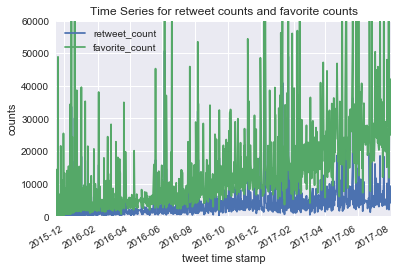

In [486]:
tae1 = tae.filter(['timestamp','retweet_count', 'favorite_count'])
fig = plt.figure(figsize=(10,10))
time_series = tae1.plot(x='timestamp')
time_series.set_ylim([0,60000])
time_series.set_xlabel('tweet time stamp')
time_series.set_ylabel('counts')
time_series.set_title('Time Series for retweet counts and favorite counts')

In [487]:
fig_1 = time_series.get_figure()
fig_1.savefig('timeseries_favorite_retweet.png')

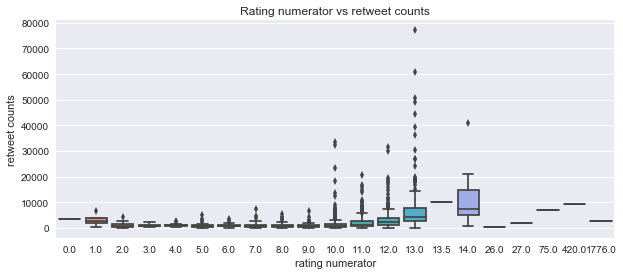

In [478]:
fig = plt.figure(figsize = (10,4))
rating_retweet = sns.boxplot(x='rating_numerator', y = 'retweet_count', data = tae)
rating_retweet.set_xlabel('rating numerator')
rating_retweet.set_ylabel('retweet counts')
rating_retweet.set_title('Rating numerator vs retweet counts')

In [479]:
fig_2 = rating_retweet.get_figure()
fig_2.savefig('rating_numerator_vs_retweet.png')

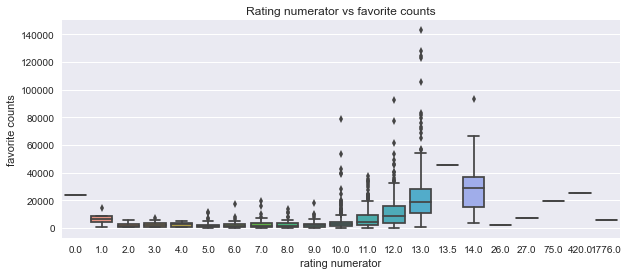

In [480]:
fig = plt.figure(figsize = (10,4))
rating_favorite = sns.boxplot(x='rating_numerator', y = 'favorite_count', data = tae)
rating_favorite.set_xlabel('rating numerator')
rating_favorite.set_ylabel('favorite counts')
rating_favorite.set_title('Rating numerator vs favorite counts')

In [482]:
fig_3 = rating_favorite.get_figure()
fig_3.savefig('rating_numerator_vs_favorite.png')

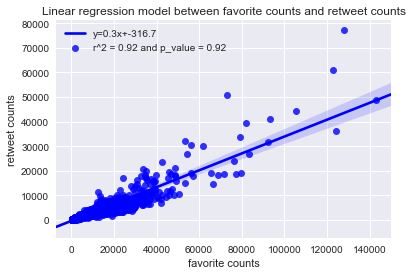

In [483]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tae['favorite_count'],tae['retweet_count'])

# use line_kws to set line label for legend
fig = plt.figure()
ax = sns.regplot(x='favorite_count', y='retweet_count', data=tae, color='b',
                 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},
                label = "r^2 = {0:.2f} and p_value = {0:.2f}".format(r_value, p_value))
ax.legend()
ax.set_xlabel('favorite counts')
ax.set_ylabel('retweet counts')
ax.set_title('Linear regression model between favorite counts and retweet counts')

In [484]:
fig_4 = ax.get_figure()
fig_4.savefig('favorite_vs_retweet.png')